In [324]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

%matplotlib inline
pd.options.display.max_rows = 3000
from warnings import filterwarnings
filterwarnings('ignore')

In [325]:

df = pd.read_csv("restaurant.csv",encoding="UTF-8")

In [326]:
df.head(10)


,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,46019,Unique Brew Cafe Resto,No,No,NaN,0,Indiranagar,Quick Bites,NaN,Fast Food,200,[],[],Dine-out,Old Airport Road
1,28849,Jayanthi Sagar,No,No,3.1 /5,21,Koramangala 5th Block,Quick Bites,NaN,"South Indian, North Indian, Chinese",200,"[('Rated 2.0', ""RATEDn Works only because it'...",[],Dine-out,Koramangala 4th Block
2,19855,Rock Stone Ice Cream Factory,Yes,No,4.0/5,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar
3,35188,Punjabi by Nature 2.0,No,No,4.2 /5,3236,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,NaN,"[('Rated 3.0', ""RATEDn It has a beautiful amb...",[],Delivery,Koramangala 7th Block
4,7070,Rayalaseema Chefs,Yes,Yes,3.9/5,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield
5,32050,Bistro Oui,Yes,Yes,4.1 /5,402,Koramangala 5th Block,"Cafe, Bar","Veg Burger, Pork Ribs, Pizza, Chicken Sandwich...","Cafe, Continental, Salad, Steak","1,200","[('Rated 4.0', 'RATEDn Funny & TastynnWe visi...",[],Pubs and bars,Koramangala 5th Block
6,9918,Bhavani Upahara,Yes,No,3.3/5,9,Bannerghatta Road,Quick Bites,NaN,South Indian,250,"[('Rated 5.0', 'RATEDn best north Karnataka f...",[],Delivery,BTM
7,6134,Hotel Tom's Restaurant,Yes,Yes,4.4/5,712,Richmond Road,Casual Dining,"Appam, Sea Food, Fry Prawns, Dal Fry, Chicken ...","Mangalorean, Seafood, Chinese, North Indian","1,000","[('Rated 4.0', ""RATEDn Quite an old place to ...",[],Dine-out,Brigade Road
8,5350,Munchies,Yes,No,3.9/5,64,Brigade Road,"Quick Bites, Bakery","Burgers, Sandwiches, Momos, Chicken Seekh Roll...","Fast Food, Bakery",250,"[('Rated 4.0', 'RATEDn I am glad i found this...","['Spicy Mixed Vegetable Club Sandwich', 'Chick...",Delivery,Brigade Road
9,2301,Vinaya Coffee Moments,Yes,No,3.8/5,46,JP Nagar,Cafe,"Filter Coffee, Pizza, Pasta","Burger, Cafe, Desserts, Sandwich, Italian",450,"[('Rated 3.0', ""RATEDn This is great place fo...",[],Dine-out,Bannerghatta Road


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   2069 non-null   int64 
 1   name                         2069 non-null   object
 2   online_order                 2069 non-null   object
 3   book_table                   2069 non-null   object
 4   rate                         1770 non-null   object
 5   votes                        2069 non-null   int64 
 6   location                     2069 non-null   object
 7   rest_type                    2052 non-null   object
 8   dish_liked                   962 non-null    object
 9   cuisines                     2069 non-null   object
 10  approx_cost(for two people)  2053 non-null   object
 11  reviews_list                 2069 non-null   object
 12  menu_item                    2069 non-null   object
 13  listed_in(type)              2069

In [328]:
df.nunique()

Unnamed: 0                     2069
name                           1665
online_order                      2
book_table                        2
rate                             55
votes                           588
location                         82
rest_type                        64
dish_liked                      825
cuisines                        771
approx_cost(for two people)      46
reviews_list                   1698
menu_item                       483
listed_in(type)                   7
listed_in(city)                  30
dtype: int64

In [329]:
# Let's Rename the columns
df = df.rename({'Unnamed: 0':'id', 'approx_cost(for two people)':'cost_for_two', 
                                      'rate':'aggregate_rating', 'approx_cost(for two people)':'cost_for_two',
                                     'listed_in(type)':'category', 'listed_in(city)':'city'},axis=1)

In [330]:
print(df['reviews_list'].values[0])


[]


In [331]:
df.duplicated().sum()

0

In [332]:
df = df[df['aggregate_rating'].notnull()]

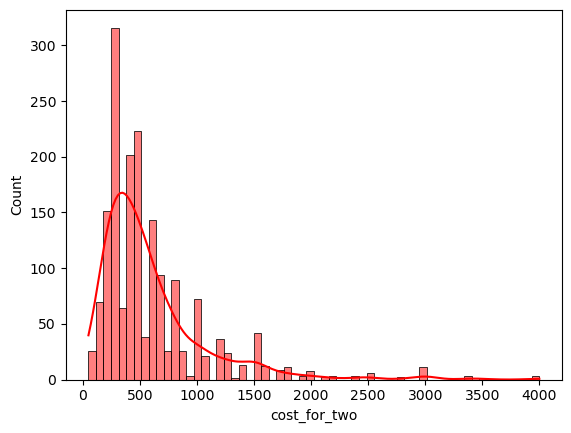

In [333]:
# Now let's check how budget friendly the restaurant are
sns.histplot(restaurant_df.cost_for_two, kde=True, palette="coolwarm",color="red")
plt.show()

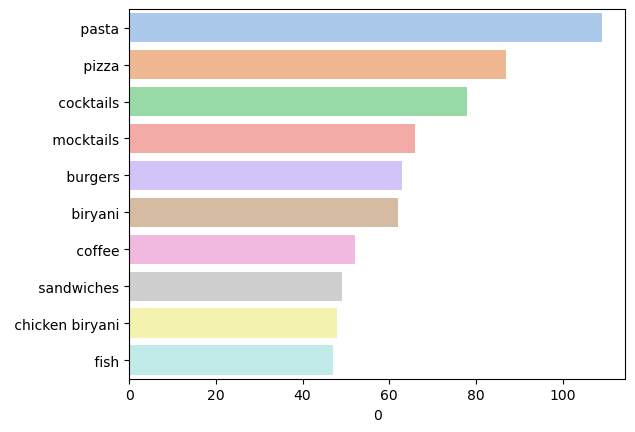

In [334]:
# Let's checkout top 10 favourite food of Bangaloreans
dish_liked=restaurant_df.loc[restaurant_df['dish_liked']!='not specified','dish_liked']
import re
likes=[]
for dish in dish_liked:
    splited_array=re.split(',',dish)
    for item in splited_array:
        likes.append(item)

sns.barplot(x=pd.DataFrame(likes)[0].value_counts().head(10),y=pd.DataFrame(likes)[0].value_counts().head(10).index,palette="pastel")
plt.show()

In [335]:
df['name'] = df['name'].str.lower()
df['location'] = df['location'].str.lower()
df['rest_type'] = df['rest_type'].str.lower()
df['dish_liked'] = df['dish_liked'].str.lower()
df['cuisines'] = df['cuisines'].str.lower()
df['menu_item'] = df['menu_item'].str.lower()
df['city'] = df['city'].str.lower()

In [336]:
df['rest_type'] = df['rest_type'].str.replace("'|\[|\]",'')#(",|'|\[|\]",'')    # this code removes replace comma, square bracket and quotes with space
df['menu_item'] = df['menu_item'].str.replace("'|\[|\]",'')#(",|'|\[|\]",'')
df['menu_item'] = df['menu_item'].str.replace(r'^\s*$','not specified')
df['dish_liked'] = df['dish_liked'].str.replace("'|\[|\]",'')#(",|'|\[|\]",'')
df['cuisines'] = df['cuisines'].str.replace("'|\[|\]",'')#(",|'|\[|\]",'')
df['cost_for_two'] = df['cost_for_two'].str.replace(",",'').astype(float)
df['aggregate_rating'] = df['aggregate_rating'].str.replace("\/5",'')

In [337]:
def rating_type(rating):
    """Assign category to each rating"""
    if rating>=3.5:
        return 'good'
    elif rating>=2.0:
        return 'average'
    else:
        return 'bad'

# Extract rating from reviews as a list
df['rating_list'] = df['reviews_list'].str.findall(r"(?:'Rated )(\d+\.\d)")

# Convert rating list to float from string
df['rating_list'] = df['rating_list'].apply(lambda x: list(map(float, x)))

# Assign category to each rating in the list
df['rating_list'] =df['rating_list'].apply(lambda x: list(map(rating_type, x)))

# Count each type of rating and form a dictionary for each record
df['rating_list'] = df['rating_list'].apply(lambda x: {b:x.count(b) for b in x})

# Split this dictionary to separate column and concatenate to the dataframe
df = pd.concat([df,df['rating_list'].apply(pd.Series)], axis = 1)

In [338]:
#  Let's do some calculation and find the percentage of good, average and bad reviews
# fill NaN with 0
str_cols = ['good','average','bad']
df[str_cols] = df[str_cols].fillna(0)

# Convert these three columns to int
df[str_cols] = df[str_cols].astype(int)

# Add these three columns and create a new column for total rating count
df['number_of_reviews']=df['average']+df['good']+df['bad']

# Convert to these rating count to percentage
df[str_cols] = df[str_cols].apply(lambda x: round(x/df['number_of_reviews']*100,2))

# Again fill NaN with 0
df[str_cols] = df[str_cols].fillna(0)

# Rename the column
df = df.rename({'average':'neutral_reviews_percentage', 'good':'positive_reviews_percentage', 'bad':'negative_reviews_percentage'},axis=1)


In [339]:

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub(r'\[\[(?:[^\]|]*\|)?([^\]|]*)\]\]', '', text).strip('[]')

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('UTF-8', 'ignore') #ISO-8859-1
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.append('rated')
stopword_list.append('ratedn')
stopword_list.append('specified')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words



def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [340]:
def normalize_and_lemmatize(input):
    sample = denoise_text(input)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    words = lemmatize(words)
    
    return ' '.join(words)

In [341]:
df['cleaned_reviews'] = df['reviews_list'].map(lambda text: normalize_and_lemmatize(text))

In [342]:
print(df['reviews_list'].values[10])

[('Rated 4.5', 'RATEDn  Try there sweet lassi as there signature dishes its delicious place is opposite of empire behind hello panwala good place which available burger and dry fruit shake also available.'), ('Rated 3.5', 'RATEDn  Tried out the Oreo Shake here. A small stall that serves burgers, fries and a variety of drinks, from juice to shakes. The Oreo Shake was tasty and when you decide to consume it late at night, it is worth the trip. A decent place which attracts quite a crowd.'), ('Rated 4.5', 'RATEDn  Could never think that a small juice shop in a corner would turn out be so good. The sweet lassi is really delicious, totally worth every penny. I travel from Indiranagar just for its lassi. Must try for everyone!'), ('Rated 2.5', "RATEDn  A very low class outlet conpetiting to lassi shop.nBut doesn't have any standards of lassi shop.nNot even comparable to lassi shop because taste is not good.nThe items I tried ,n1.lassin2.dry fruit lassin3.muskmelon shaken4.coffeenLassi and dr

In [343]:
print(df['cleaned_reviews'].values[10])

try sweet lassi signature dish delicious place opposite empire behind hello panwala good place available burger dry fruit shake also available try oreo shake small stall serve burgers fry variety drink juice shake oreo shake tasty decide consume late night worth trip decent place attract quite crowd could never think small juice shop corner would turn good sweet lassi really delicious totally worth every penny travel indiranagar lassi must try everyone low class outlet conpetiting lassi shopnbut doesnt standards lassi shopnnot even comparable lassi shop taste goodnthe items try nlassindry fruit lassinmuskmelon shakencoffeenlassi dry fruit lassi goodnmuskmelon shake coffee good hop good lassi order fruit lassi regret rest even taste horrible really dont recommend anyone visit dont know dish menu lassi taste real bad


In [344]:
df.sample()

,id,name,online_order,book_table,aggregate_rating,votes,location,rest_type,dish_liked,cuisines,...,reviews_list,menu_item,category,city,rating_list,neutral_reviews_percentage,positive_reviews_percentage,negative_reviews_percentage,number_of_reviews,cleaned_reviews
1808,19127,le jardin - the oberoi,No,No,4.3,687,mg road,fine dining,"breakfast buffet, biryani, salads, chocolate c...","european, mediterranean, north indian",...,"[('Rated 5.0', 'RATEDn I was here for breakfa...",not specified,Dine-out,indiranagar,"{'good': 8, 'average': 3, 'bad': 1}",25.0,66.67,8.33,12,breakfast weekday totally love experience ambi...


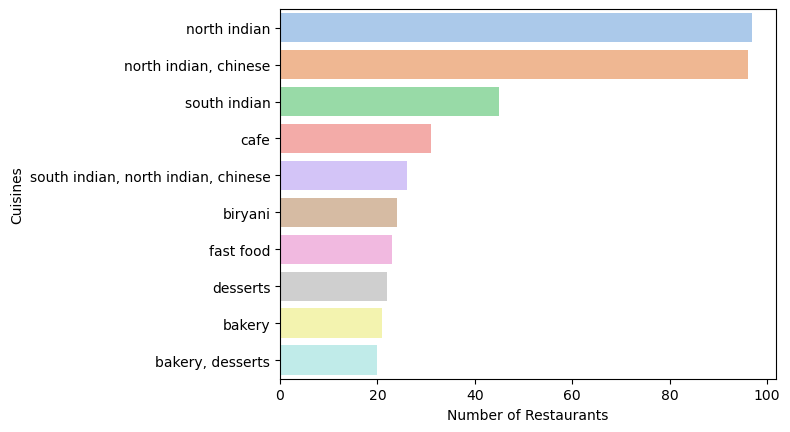

In [345]:
# Check type of Cuisines in Bangalore
x=restaurant_df['cuisines'].value_counts().head(10)
y=restaurant_df['cuisines'].value_counts().head(10).index
sns.barplot(x=x,y=y,palette="pastel")
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.show()

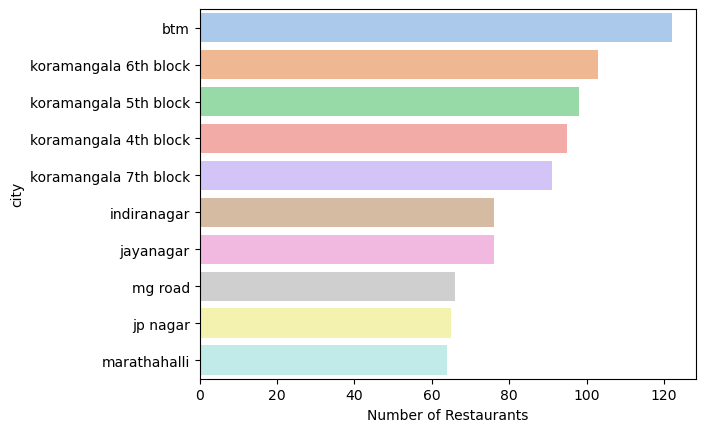

In [346]:
# Let's check out which area has most number of restaurant
x=restaurant_df['city'].value_counts().head(10)
y=restaurant_df['city'].value_counts().head(10).index
sns.barplot(x=x,y=y,palette="pastel")
plt.xlabel('Number of Restaurants')
plt.ylabel('city')
plt.show()

In [347]:
df['rest_type'] = df['rest_type'].fillna('not specified')
df['dish_liked'] = df['dish_liked'].fillna('not specified')

# Drop records with missing values
df = df[df['cost_for_two'].notnull()]

In [348]:
cleaned_df = df[df['aggregate_rating']!='NEW'].copy()
cleaned_df.aggregate_rating = cleaned_df.aggregate_rating.astype(float)

In [349]:
# Combine text from columns and normalize
cleaned_df['text'] = cleaned_df[['name','rest_type', 'dish_liked','menu_item', 'category' ]].agg(' '.join, axis=1)
cleaned_df['text'] = cleaned_df['text'].map(lambda text: normalize_and_lemmatize(text))
cleaned_df['text'] = cleaned_df[['text','cleaned_reviews']].agg(' '.join, axis=1)

In [350]:
# Take use input
user_text = input("Type your prefernces : ")
location = input("Location you want to be served : ").lower()
budget = input("Your Maximum Budget for two: ")
cuisine_type = input("Cuisines Type : ").lower()

Type your prefernces : cheap restaurant
Location you want to be served : btm
Your Maximum Budget for two: 800
Cuisines Type : north indian


In [351]:
def get_recommendation(user_text,location,budget,cuisine_type,recommendation_count=3):
    user_text = [normalize_and_lemmatize(user_text)]
    
    filtered_df = cleaned_df.copy()
    
    # Filter restaurants based on location
    if len(location)>0:
        filtered_df = filtered_df[filtered_df['location'].str.contains(location)]
    
    
    # Filter restaurants based on budget
    if len(budget)>0:
        filtered_df = filtered_df[filtered_df['cost_for_two']<=float(budget)]
    
    # Filter restaurants based on cuisine type
    if len(cuisine_type)>0:
        filtered_df = filtered_df[filtered_df['cuisines'].str.contains(cuisine_type)]
    
    # Initialize Vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    
    # make tfidf matrix for combined text 
    tfidf_text = tfidf_vectorizer.fit_transform((filtered_df['text'])) #fitting and transforming the vector
    
    # make tfidf matrix for user input text
    user_tfidf = tfidf_vectorizer.transform(user_text)
    
    # calculate similarity score using cosine similarity
    cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_text)
    sim_scores = list(cos_similarity_tfidf)
    list_scores = [sim_scores[i][0][0] for i in range(len(sim_scores))]
    filtered_df['similarity_score']=list_scores
    
    # Recommend top n restaurant using similarity_score followed by popularity_score
    recommendations = filtered_df.sort_values(['similarity_score'], ascending=False)
    
    return (recommendations.head(recommendation_count)[['name','location','book_table', 'aggregate_rating', 'votes', 'location', 
                                                       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'menu_item','neutral_reviews_percentage', 'positive_reviews_percentage',
                                                       'negative_reviews_percentage', 'number_of_reviews']]) 
                                                       

get_recommendation(user_text,location,budget,cuisine_type,7)

,name,location,book_table,aggregate_rating,votes,location,rest_type,dish_liked,cuisines,cost_for_two,menu_item,neutral_reviews_percentage,positive_reviews_percentage,negative_reviews_percentage,number_of_reviews
1057,chef all nite,btm,No,3.8,464,btm,not specified,"paneer manchurian, gulab jamun, noodles, chick...","chinese, north indian",300.0,not specified,50.00,50.00,0.00,2
408,food junction,btm,No,3.5,42,btm,quick bites,paratha,"north indian, chinese, street food, biryani",400.0,not specified,46.15,41.03,12.82,39
911,darshan paradise restaurant,btm,No,3.6,16,btm,quick bites,not specified,"north indian, chinese",300.0,not specified,16.67,83.33,0.00,6
864,food junction,btm,No,3.6,42,btm,quick bites,paratha,"north indian, chinese, street food, biryani",400.0,not specified,50.00,41.67,8.33,24
1966,royal view restaurant,btm,No,3.7,26,btm,casual dining,not specified,"north indian, chinese, arabian",700.0,not specified,0.00,90.91,9.09,11
2023,new tasty cafeteria,btm,No,3.8,377,btm,quick bites,"shawarma, chicken grill, faluda","north indian, kerala",500.0,not specified,50.00,50.00,0.00,2
628,swad restaurant,btm,No,3.7,115,btm,casual dining,"thali, paratha, dal kichadi","chinese, north indian",550.0,not specified,28.07,63.16,8.77,171
